**Disclaimer**: The TwitterCollector package is created by Proessor Gene Moo Lee, Jaecheol Park and Xiaoke Zhang from UBC.

## Table of Contents
[Key Word Selection & Data Collection](#Data_Collection)  
[Preliminary Analysis](#Prelim)  
[Word Cloud](#Word_Cloud)  
[Sentiment Analysis](#Sentiment)


 <a id="Data_Collection"></a>
## <font color='blue'>[Part A]</font> Key Word Selection & Data Collection



In [1]:
#Import packages
from pprint import pprint
import time
import json
import nltk
from collections import Counter
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import os
import tweepy
from TwitterCollector import TwitterCollector
from datetime import datetime

In [2]:
#INSERT TOKEN HERE

#bearer_token = r""
#tc = TwitterCollector(bearer_token = bearer_token)

***1) Identify keywords***

In [3]:
query = 'queen elizabeth -is:retweet lang:en'  # tweets containing 'queen elizabteh', written in English, and excluding retweets

***2) Collect 10k tweets***

In [4]:
#recent_tweets = tc.fetch_recent_tweets(query = query  # specify the search query
#                                            , tweets_cnt = 10000  # specify the number of tweets you want to collect
#                                            , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
#                                            , file_name = '10000 recent post_queen elizabeth_non-retweet_EN.json')


In [5]:
#Load saved dataset

with open('10000 recent post_queen elizabeth_non-retweet_EN.json') as infile:
    data = json.load(infile)

In [6]:
#Inspect recent tweets
print(data.keys())
print(type(data['tweets']))
print(data['tweets'][0].keys())
pprint(data['tweets'][0])


dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])
<class 'list'>
dict_keys(['public_metrics', 'entities', 'possibly_sensitive', 'created_at', 'lang', 'author_id', 'id', 'context_annotations', 'source', 'edit_history_tweet_ids', 'text'])
{'author_id': '1230562055624765440',
 'context_annotations': [{'domain': {'description': 'Named places in the '
                                                    'world, like Fenway Park',
                                     'id': '13',
                                     'name': 'Place'},
                          'entity': {'id': '1285670730764480516',
                                     'name': 'Buckingham Palace'}},
                         {'domain': {'description': 'A taxonomy view into the '
                                                    'Semantic Core knowledge '
                                                    'graph',
                                     'id': '131',
                           

***3) Collect author IDs***

In [7]:
#authors = []
#for tweet in data['tweets']:
#    try:
#        txt = tweet['author_id']
#        author_info = tc.fetch_author_info(txt)
#        authors.append(author_info)
#        with open(r"authors/"+str(txt)+".json", 'w', encoding = 'utf-8') as w:
#            w.write(json.dumps(author_info))
#        time.sleep(2)

    #TooManyRequests workaround taken from https://piazza.com/class/l6361peonhd70r/post/200
#    except tweepy.TooManyRequests:
#        print('TooManyRequests')
#        time.sleep(15*60) # Rest for 15 mins and wait for the timeframe to reset
    #TypeError workaround taken from https://piazza.com/class/l6361peonhd70r/post/211
#    except TypeError:
#        pass
#    #AttributeError workaround taken from https://piazza.com/class/l6361peonhd70r/post/202
#    except AttributeError:
#        pass

#print(len(authors))

In [8]:
#Create a dictionary to reference this information later on and not rely on successive calls to Twitter's API
#Code created by Xiaoke Zhang
authors_dictionary = {}
for author in os.listdir('authors'):
    try:
        #print(os.path.join('authors', author))
        with open(os.path.join('authors', author), 'r', encoding = 'utf-8') as r:
            author_info = json.loads(r.read())
        authors_dictionary[author_info['id']] = author_info
    except TypeError:
        pass

In [9]:
unique_author_ID =[]
author_count = 0
for tweet in data['tweets']:
    ID = tweet['author_id']
    if ID not in unique_author_ID:
        unique_author_ID.append(ID)
        author_count += 1
print(len(unique_author_ID))
print(author_count)

6855
6855


 <a id="Prelim"></a>
## <font color='blue'>[Part B]</font> Preliminary Analysis

In [10]:
#Prepare words list
words_list = []

for tweet in data['tweets']:
    words = tweet['text'].split()
    words_list.extend(words)

***1a)  10 most popular words (stop words included)***

In [11]:
#Counter w/ stop words
c = Counter(words_list)
c.most_common(10)

[('the', 8224),
 ('Queen', 8183),
 ('Elizabeth', 6572),
 ('of', 5172),
 ('to', 4400),
 ('and', 3552),
 ('in', 2934),
 ('a', 2932),
 ('is', 1762),
 ('for', 1724)]

***1b) 10 most popular words (stop words NOT included)***

In [12]:
#Prepare stop words
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)
new_stops = ['&amp', 'https', 't', 'co', 'T', 'The','&amp;', 'via', 'II.',"II's", 'It', 'And', 'T', 'S', 'need', 'still', 'got', 'called', 'look', 'back', 'thing']
stopwords.extend(new_stops)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
#Eliminate stop words from text
words_list_nonstop = []
for word in words_list:
    if word not in stopwords and len(word)>1:
        words_list_nonstop.append(word)
        
#Counter w/o stop words
c_nonstop = Counter(words_list_nonstop)     
c_nonstop.most_common(10)

[('Queen', 8183),
 ('Elizabeth', 6572),
 ('II', 1659),
 ('#Elizabeth', 1618),
 ('#TheTRNDshop', 1470),
 ('#Tshirt', 1200),
 ('#Queen', 1158),
 ('queen', 1146),
 ('#Tribute', 1035),
 ('King', 707)]

***2) 10 most popular hashtags (#)***

In [14]:
#Create a list of hashtags and their appearing frequencies
hash_list = []

for word in words_list:
    if '#' in word:
        hash_list.append(word)

#Sort top 10 frequently mentioned hashtags
c_hash = Counter(hash_list)
c_hash.most_common(10)

[('#Elizabeth', 1618),
 ('#TheTRNDshop', 1470),
 ('#Tshirt', 1200),
 ('#Queen', 1158),
 ('#Tribute', 1035),
 ('#EtsySeller', 429),
 ('#Portrait', 245),
 ('#England', 171),
 ('#QueenElizabethII', 89),
 ('#QueenElizabeth', 88)]

***3) 10 most frequenty mentioned usernames (@)***

In [15]:
#Create a list of mentioned users and their appearing frequencies
mention_list = []

for word in words_list:
    if len(word) > 1 and '@' in word:
        mention_list.append(word)
        
#Sort top 10 frequently mentioned users  
c_mention = Counter(mention_list)
c_mention.most_common(10) 

[('@YouTube', 145),
 ('@RoyalFamily', 144),
 ('@KensingtonRoyal', 51),
 ('@eBay', 42),
 ('@ChrisJack_Getty', 39),
 ('@people', 37),
 ('@RoyalArjan', 27),
 ('@Yahoo', 25),
 ('@trussliz', 23),
 ('@eBay_UK', 22)]

***4) 3 most common sources***

In [16]:
#Create a list of sources and their appearing frequencies
source_list = []
for tweet in data['tweets']:
    source = tweet['source']
    source_list.append(source)

#Sort top 3 common sources    
c_source = Counter(source_list)
c_source.most_common(3)

[('Twitter for iPhone', 2228),
 ('Twitter Web App', 2072),
 ('Twitter for Android', 1869)]

***5) Time trend: Number of tweets per day***

In [17]:
len(data['tweets'])

10000

'2022-10-05T06:35:06.000Z'
'2022-10-01T16:05:52.000Z'


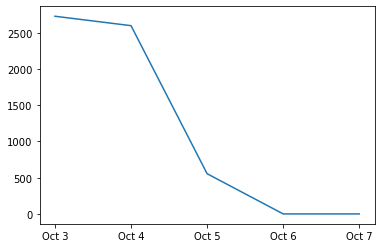

In [18]:
#Inspect time stamps to identify start date and end date
pprint(data['tweets'][0]['created_at'])
pprint(data['tweets'][9999]['created_at'])

#Count number of tweets by days
tweets_by_days = {'Oct 3': 0, 'Oct 4': 0, 'Oct 5': 0, 'Oct 6': 0, 'Oct 7' :0}

for tweet in data['tweets']:
    time_stamp = tweet['created_at']
    if "10-03" in time_stamp:
        tweets_by_days['Oct 3'] += 1
    elif "10-04" in time_stamp:
        tweets_by_days['Oct 4'] += 1
    elif "10-05" in time_stamp:
        tweets_by_days['Oct 5'] += 1
    elif "10-06" in time_stamp:
        tweets_by_days['Oct 6'] += 1
    elif "10-07" in time_stamp:
        tweets_by_days['Oct 7'] += 1

#Plot tweets by days
days = list(tweets_by_days.keys())
counts = list(tweets_by_days.values())


%matplotlib inline 
plt.plot(days,counts)

***6) 3 most influential tweets***

In [19]:
#Create a dictionary of tweets and their influence points
tweet_influence = {}
for tweet in data['tweets']:
    influence_point = sum(list(tweet['public_metrics'].values()))
    text = tweet['text']
    tweet_influence[text]= influence_point

#Sort top 3 influential tweets
df= pd.DataFrame(tweet_influence.items(), columns = ['Tweets', 'Influence points'])
most_influential_tw = df.sort_values('Influence points', ascending=False)[0:3]

print("The most influential tweets are:")
print('\n')
for index, tweet in most_influential_tw.iterrows():
    print("- " + tweet['Tweets'])
    print('\n')
    
df.sort_values('Influence points', ascending=False)[0:3]

The most influential tweets are:


- “It’s difficult not to see the racism or to explain away the vitriol for Markle – the droning, relentless persecution – as anything but racial prejudice.” https://t.co/lDBQoPnZnH


- UPDATE: British manufacturer Gravity Industries has successfully demonstrated its pioneering jet suits in America, circling New York harbour after taking off from the HMS Queen Elizabeth aircraft carrier. #UKmfg🇬🇧 https://t.co/gc7bKfTSlG


- Buckingham Palace releases a new official photo of the King, the Queen Consort and the Prince and Princess of Wales following the death of Queen Elizabeth II: https://t.co/lXlOIEQdZx https://t.co/hStIS8x16I




,Tweets,Influence points
9818,“It’s difficult not to see the racism or to ex...,10376
4594,UPDATE: British manufacturer Gravity Industrie...,5280
4258,Buckingham Palace releases a new official phot...,4789


***7) 3 most vocal tweeters***

In [20]:
#Most vocal and most influential

#First we create a dictionary containing every information of interest from the authors
#We take all 'public_metrics' value separately in case a future analysis would need that
    #but we know the most important metrics for our analysis right now are 'tweet_count' and 'influence',
    #which is the sum of all 'public_metrics' values.
author2df = {}
author2df['id'] = []
author2df['username'] = []
author2df['followers'] = []
author2df['tweet_count'] = []
author2df['following_count'] = []
author2df['listed'] = []
author2df['influence'] = []
for author in authors_dictionary.values():
    author2df['id'].append(author['id'])
    author2df['username'].append(author['username'])
    author2df['followers'].append(author['public_metrics']['followers_count'])
    author2df['tweet_count'].append(author['public_metrics']['tweet_count'])
    author2df['following_count'].append(author['public_metrics']['following_count'])
    author2df['listed'].append(author['public_metrics']['listed_count'])
    influence_point = sum(list(author['public_metrics'].values()))
    author2df['influence'].append(influence_point)
    
df_author = pd.DataFrame(author2df)

In [21]:
#7. Who are the three most vocal authors on the keyword?
#In other words, who are the most frequently tweeting authors in the tweet data? 

df_author = pd.DataFrame(author2df)
df_author.sort_values('tweet_count', ascending = False)[0:3]

,id,username,followers,tweet_count,following_count,listed,influence
1014,289118612,TomthunkitsMind,88291,3262266,71409,978,3422944
1176,283604227,AndyVermaut,31246,1948023,34302,59,2013630
1075,3534222021,newsoneplace,1150,1715849,154,1444,1718597


***8) 3 most influential tweeters***

In [22]:
#8. 3 most influential tweeters?
#A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”
#“tweet_count” in the author data

df_author.sort_values('influence', ascending = False)[0:3]

,id,username,followers,tweet_count,following_count,listed,influence
281,36327407,htTweets,8637783,1137554,139,8323,9783799
556,16343974,Telegraph,3312860,507997,897,21270,3843024
1014,289118612,TomthunkitsMind,88291,3262266,71409,978,3422944


 <a id="Word_Cloud"></a>
## <font color='blue'>[Part C]</font> Word Cloud

In [23]:
#Convert all tweets into a string without stop words
one_text =''
stopwords2 = nltk.corpus.stopwords.words('english')
stopwords2.extend(new_stops)

for word in words_list_nonstop:
    if len(word) ==1 or word in stopwords or ('https' in word) or 'amp' in word or 'II' in word:
        continue
    one_text = one_text + " " + word
        

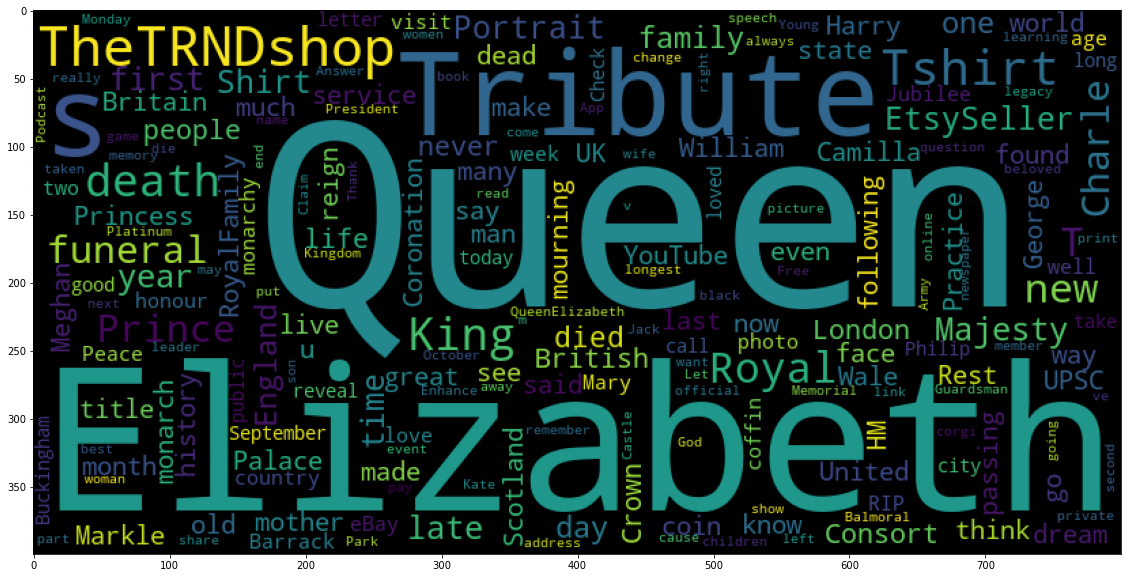

In [24]:
#Run word cloud on the strings\
wordcloud = WordCloud(collocations = False, width = 800, height = 400).generate(one_text)

#Word cloud visualization taken from Professor Gene's in-class example 
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('queen_word_cloud.png') # save as PNG file
plt.savefig('queen_word_cloud.pdf') # save as PDF file
plt.show()

 <a id="Sentiment"></a>
## <font color='blue'>[Part D]</font> Sentiment Analysis

***1) Average subjectivity & polarity***

In [25]:
subjectivity = []
polarity = []
for tweet in data['tweets']:
    text = tweet['text']
    tb = TextBlob(text)
    polarity.append(tb.sentiment.polarity)
    subjectivity.append(tb.sentiment.subjectivity)


In [26]:
print("Average tweet subjectivity is: " + str(np.mean(subjectivity)))
print("Avergage tweet polarity is: " + str(np.mean(polarity)))

Average tweet subjectivity is: 0.31909493251631527
Avergage tweet polarity is: 0.07506652849962761


***2) Sentiment visualization***

(array([3679.,  538.,  778.,  721., 1221., 1228.,  591.,  393.,  261.,
         590.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

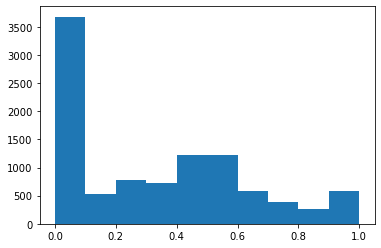

In [27]:
plt.hist(subjectivity, bins = 10)

(array([1.900e+01, 4.000e+00, 2.900e+01, 2.500e+01, 4.800e+01, 1.910e+02,
        2.080e+02, 4.090e+02, 4.870e+02, 4.460e+02, 4.971e+03, 9.860e+02,
        7.350e+02, 4.500e+02, 1.590e+02, 4.210e+02, 1.770e+02, 7.900e+01,
        9.700e+01, 5.900e+01]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

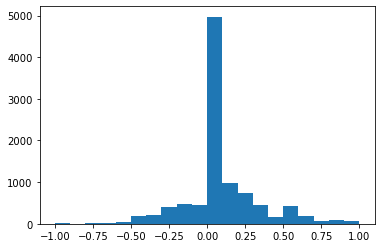

In [28]:
plt.hist(polarity, bins = 20)

***3) Sentiment inspection***

In [29]:
polar_tweets = {}

for tweet in data['tweets']:
    text = tweet['text']
    tb = TextBlob(text)
    sentiment = tb.sentiment.polarity
    polar_tweets[text] = sentiment



In [30]:
df_polarity = pd.DataFrame(polar_tweets.items(), columns = ['Tweet', 'Polarity'])
sorted_polarity = df_polarity.sort_values('Polarity', ascending = True)
print(sorted_polarity.head())
print(sorted_polarity.tail())

                                                  Tweet  Polarity
9064  @_x864 @NastyWoman532 @scobie @ChrisJack_Getty...      -1.0
9797  @Luxxmeii @_HiroTD_ IM SORRY QUEEN ELIZABETH??...      -1.0
4690  1570: Manuel da Nóbrega died, Malaye Jaziri bo...      -1.0
9319  Terrible legacy media take on Queen Elizabeth'...      -1.0
8048  Prince Harry reportedly said “really nasty thi...      -1.0
                                                  Tweet  Polarity
5060  What a wonderful way to remember Her Majesty. ...       1.0
4719  Great news that a community garden has been se...       1.0
8040  Very  beautiful pictures of Her Majesty The Qu...       1.0
4071  I got: 12/13 You won best in show!  https://t....       1.0
837   Queen Elizabeth II Is The Greatest potato chip...       1.0


In [31]:
most_negative = sorted_polarity.iloc[0:5,0]
for tweet in most_negative:
    print("- " + tweet)
    print('\n')

- @_x864 @NastyWoman532 @scobie @ChrisJack_Getty Nasty woman is now on Google desperate to find who queen Elizabeth the eleventh is!!!


- @Luxxmeii @_HiroTD_ IM SORRY QUEEN ELIZABETH??!!!?!?!


- 1570: Manuel da Nóbrega died, Malaye Jaziri born. Ivan the Terrible begins the Massacre of Novgorod. Pope Pius V excommunicates Queen Elizabeth I of England, with the bull Regnans in Excelsis. Baabullah becomes Sultan of Ternate (present-day Indonesia) after Hairun's death.


- Terrible legacy media take on Queen Elizabeth's death https://t.co/gedGdx3UHp via @YouTube


- Prince Harry reportedly said “really nasty things” about the Queen Consort, Camilla, claims a royal author.
#Elizabeth #Tshirt #TheTRNDshop #Tribute #Queen 

👉https://t.co/u9sDmbzSHA https://t.co/WSvJyZN2jp




In [32]:
most_positive = sorted_polarity.iloc[-6:-1,0]
for tweet in most_positive:
    print("- " + tweet)
    print('\n')

- Queen Elizabeth's Halloween costume this year is gonna be her best one yet.


- What a wonderful way to remember Her Majesty. https://t.co/Wiwa9xoFxz


- Great news that a community garden has been selected to be part of Queen Elizabeth II's tree-planting legacy! 🌳
https://t.co/fP9YvSBnWv


- Very  beautiful pictures of Her Majesty The Queen Elizabeth the II     https://t.co/Lf1DBWr509


- I got: 12/13 You won best in show!  https://t.co/U4UnnlVdXj via @playbuzz Missed one - didn't know Queen Elizabeth had 30 dogs while Queen.


